In [51]:
import json
import torch
import pprint
import mdtraj
import random
import pandas

import numpy as np

from tqdm import tqdm

from openmm import *
from openmm.app import *
from openmm.unit import *

from torch.utils.data import Dataset

import matplotlib.pyplot as plt


In [54]:
molecule = "alanine"
temperature = 300.0
state = "c5"

result_dir = f"../log/{molecule}/{temperature}/{state}"
pdb_file = f"../data/{molecule}-stable/{state}.pdb"

In [55]:

loaded_traj = mdtraj.load(
	f"{result_dir}/traj.dcd",
	top=pdb_file
)

In [61]:
backbone_bond_index = [
	[1, 4],
	[4, 5],
	[4, 6],
	[8, 14],
	[14, 15],
	[8, 10],
	[6, 8],
	[14, 16],
	[16, 18],
]
hydrogen_bond_index = [
	[0, 1],
	[1, 2],
	[1, 3],
 	[8, 9],
 	[10, 11],
	[10, 12],
	[10, 13],
 	[16, 17],
  	[18, 19],
	[18, 20],
	[18, 21],
	[16, 17],
]
backbone_distance = mdtraj.compute_distances(loaded_traj, backbone_bond_index).reshape(-1, 1)
hydrogen_distance = mdtraj.compute_distances(loaded_traj, hydrogen_bond_index).reshape(-1, 1)

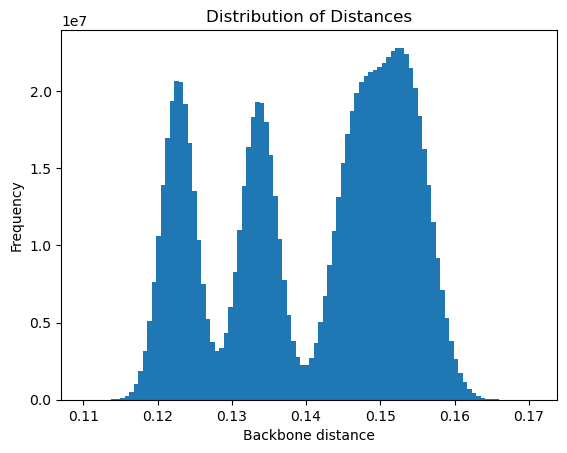

In [62]:
plt.hist(backbone_distance.flatten(), bins=100)
plt.xlabel('Backbone distance')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.title('Distribution of Distances')
plt.show()

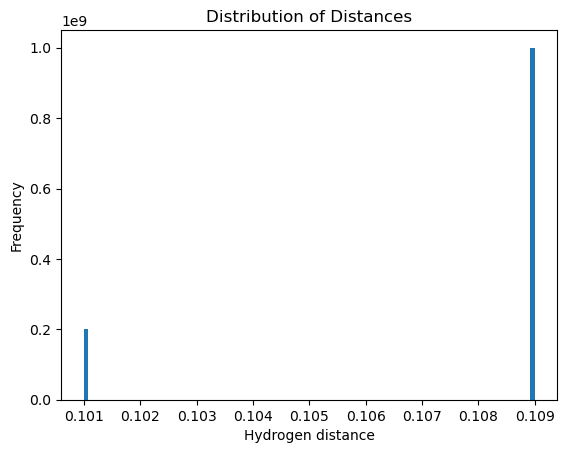

In [63]:
plt.hist(hydrogen_distance.flatten(), bins=100)
plt.xlabel('Hydrogen distance')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.title('Distribution of Distances')
plt.show()

In [64]:
CO_bond_index = [
	[4, 5],
	[14, 15],
]
CC_bond_index = [
	[1, 4],
	[8, 14],
	[8, 10],
]
CN_bond_index = [
	[4, 6],
	[6, 8],
	[14, 16],
	[16, 18],
]

co_distance = mdtraj.compute_distances(loaded_traj, CO_bond_index).reshape(-1, 1)
cc_distance = mdtraj.compute_distances(loaded_traj, CC_bond_index).reshape(-1, 1)
cn_distance = mdtraj.compute_distances(loaded_traj, CN_bond_index).reshape(-1, 1)

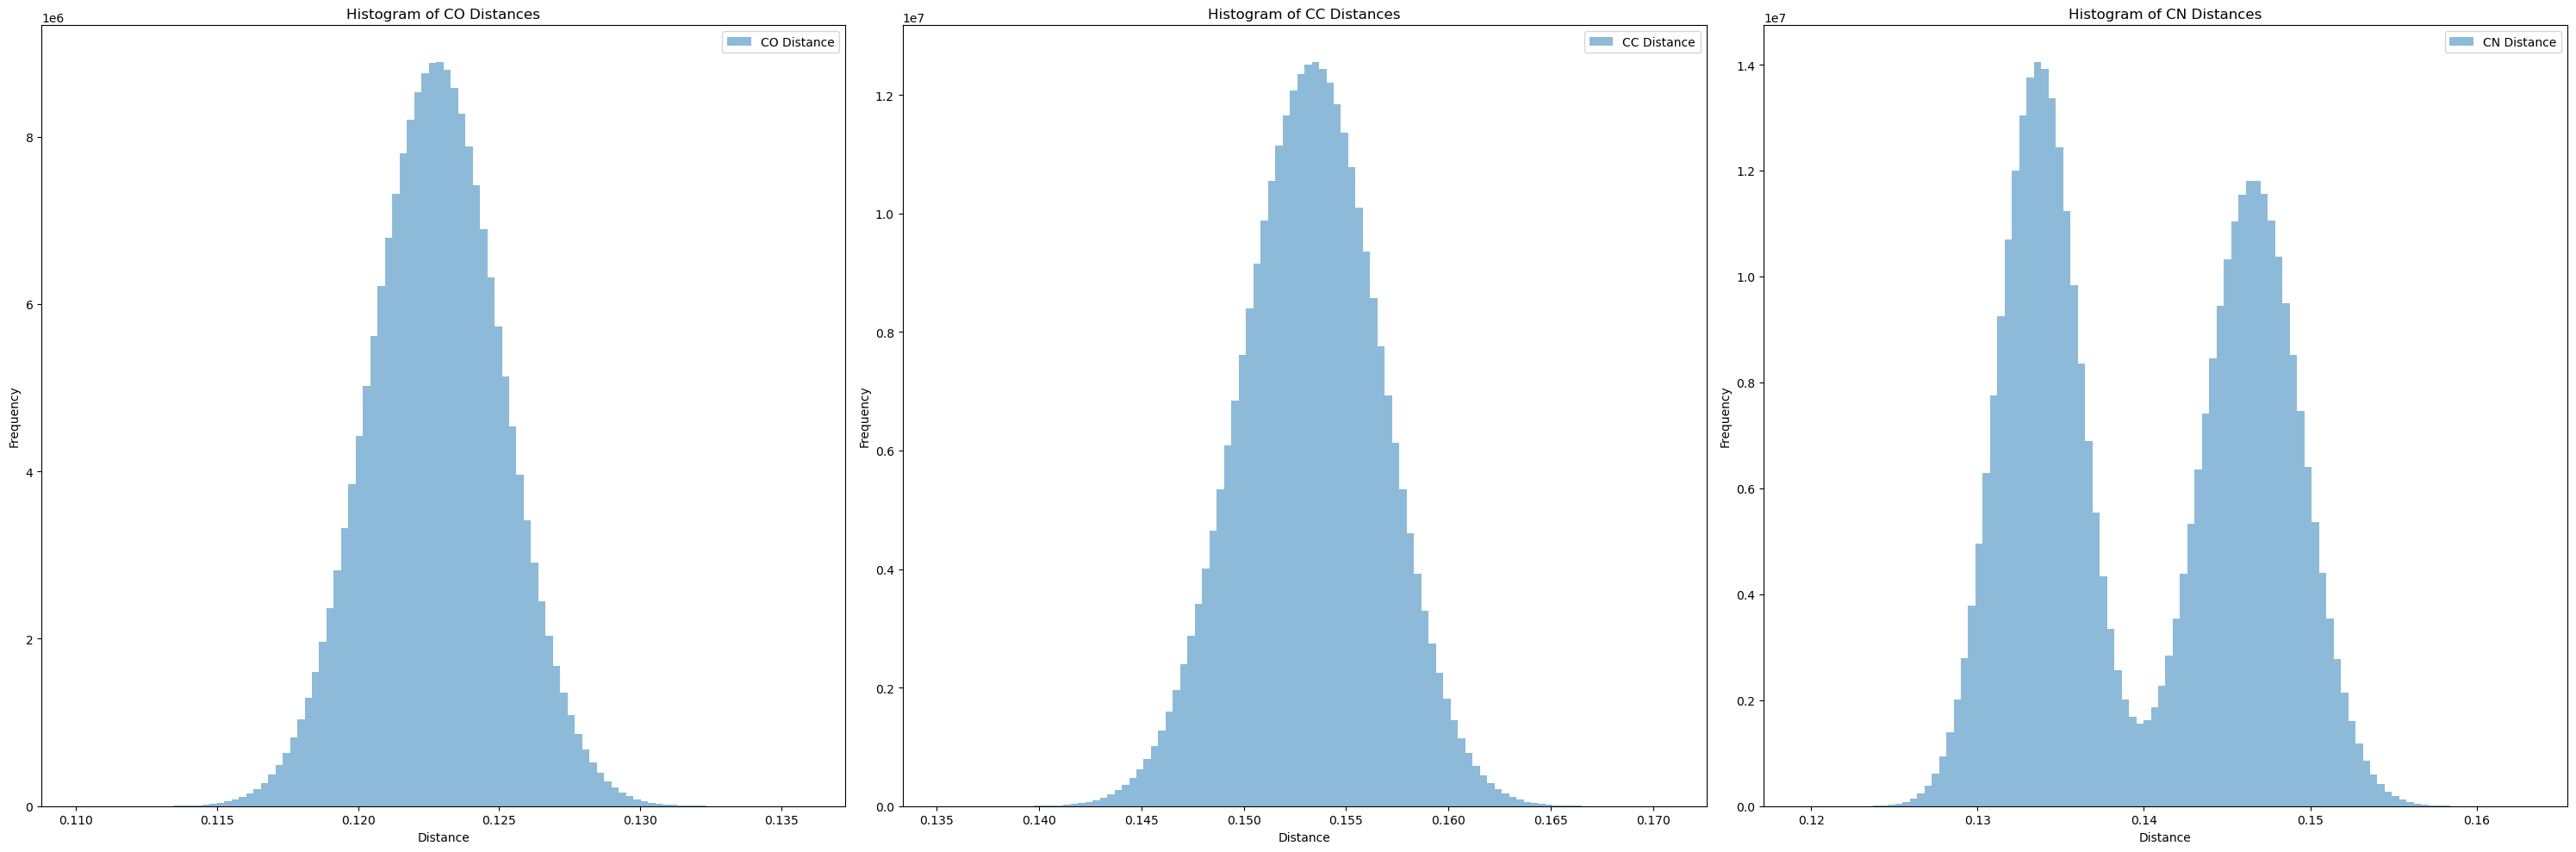

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Plot histogram for CO distances
axs[0].hist(co_distance.flatten(), bins=100, alpha=0.5, label='CO Distance')
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of CO Distances')
axs[0].legend()

# Plot histogram for CC distances
axs[1].hist(cc_distance.flatten(), bins=100, alpha=0.5, label='CC Distance')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of CC Distances')
axs[1].legend()

# Plot histogram for CN distances
axs[2].hist(cn_distance.flatten(), bins=100, alpha=0.5, label='CN Distance')
axs[2].set_xlabel('Distance')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Histogram of CN Distances')
axs[2].legend()

plt.tight_layout()
plt.show()